env: `nnn`

In [1]:
%load_ext autoreload
%autoreload 2
%run nnn/ipynb_init.py
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import os, json
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import warnings
warnings.filterwarnings("ignore")
from nnn.uv import *

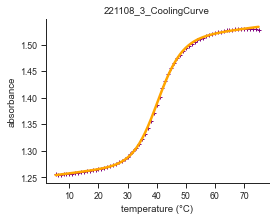

In [122]:
# for debugging
# datadir="./data/uv_melt/ECLExport"
# data_list = [fn for fn in absolute_file_paths(datadir) if fn.endswith('.csv')]
# result_dict = fit_curve(data_list[10], 
#                         figdir=os.path.join(datadir, 'fig'), debug=True)

In [9]:
sample_sheet_file = '/mnt/d/data/nnn/ECLSampleSheet221118.csv'

 65%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                         | 135/209 [01:11<00:32,  2.26it/s]

/mnt/d/data/nnn/ECLExport/220917_WC1025_duplex_25mM-Na_test/1_MeltingCurve.csv
/mnt/d/data/nnn/ECLExport/220917_WC1025_duplex_25mM-Na_test/1_SecondaryMeltingCurve.csv
/mnt/d/data/nnn/ECLExport/220917_WC1025_duplex_25mM-Na_test/2_MeltingCurve.csv
/mnt/d/data/nnn/ECLExport/220917_WC1025_duplex_25mM-Na_test/2_SecondaryMeltingCurve.csv
/mnt/d/data/nnn/ECLExport/220917_WC1025_duplex_25mM-Na_test/3_MeltingCurve.csv
/mnt/d/data/nnn/ECLExport/220917_WC1025_duplex_25mM-Na_test/3_SecondaryMeltingCurve.csv
/mnt/d/data/nnn/ECLExport/220917_WC1025_duplex_25mM-Na_test/4_MeltingCurve.csv
/mnt/d/data/nnn/ECLExport/220917_WC1025_duplex_25mM-Na_test/4_SecondaryMeltingCurve.csv
/mnt/d/data/nnn/ECLExport/220917_WC1025_duplex_25mM-Na_test/5_MeltingCurve.csv
/mnt/d/data/nnn/ECLExport/220917_WC1025_duplex_25mM-Na_test/5_SecondaryMeltingCurve.csv
/mnt/d/data/nnn/ECLExport/220917_WC1025_duplex_25mM-Na_test/6_MeltingCurve.csv
/mnt/d/data/nnn/ECLExport/220917_WC1025_duplex_25mM-Na_test/6_SecondaryMeltingCurve.cs

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 209/209 [01:37<00:00,  2.15it/s]


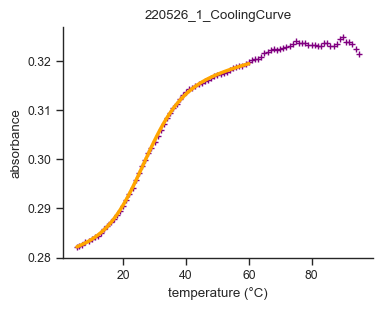

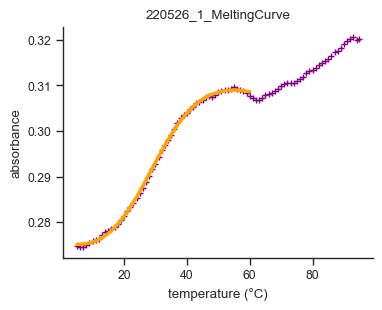

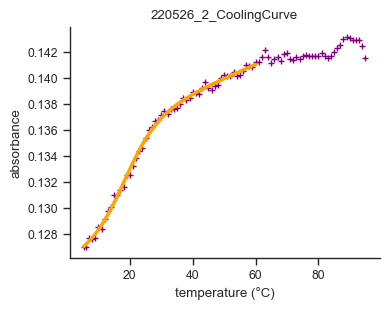

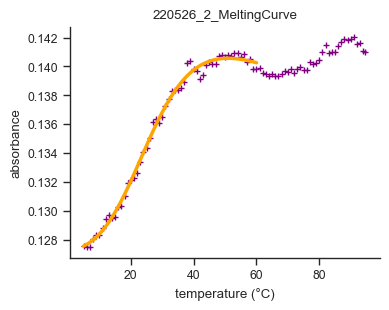

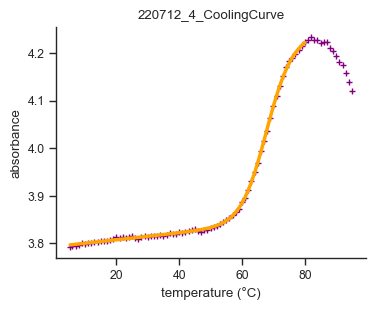

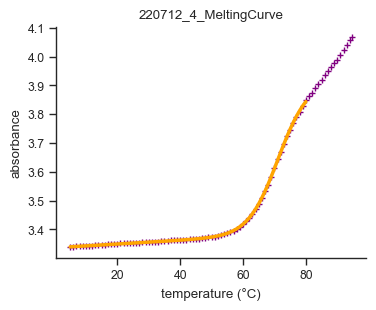

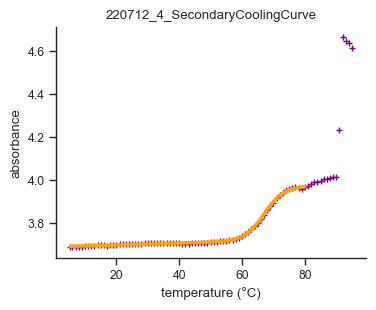

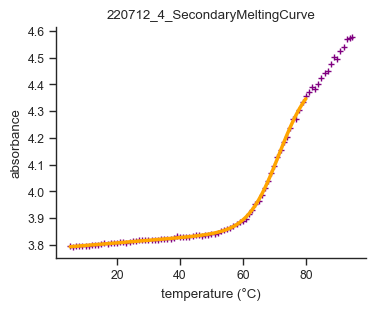

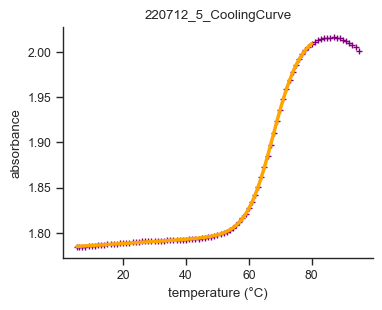

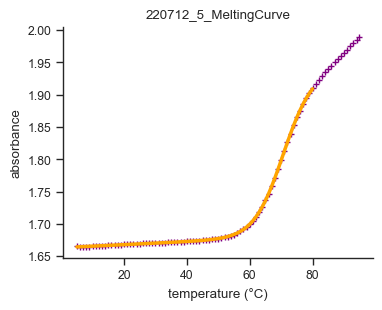

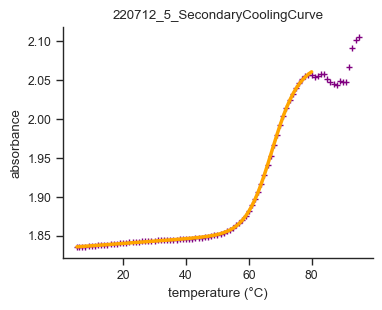

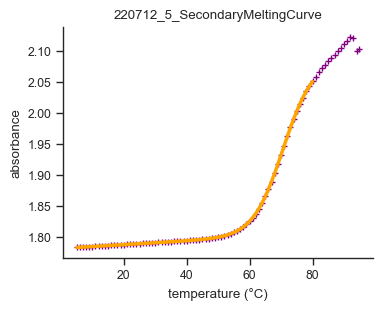

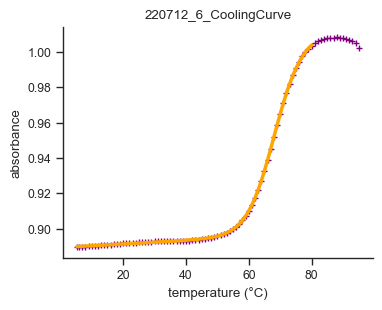

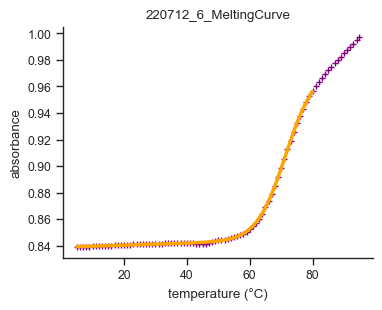

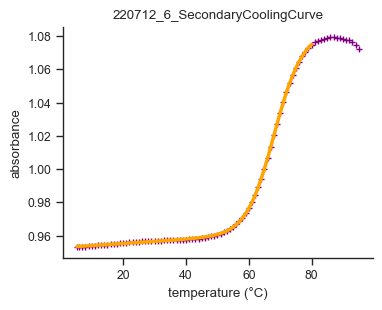

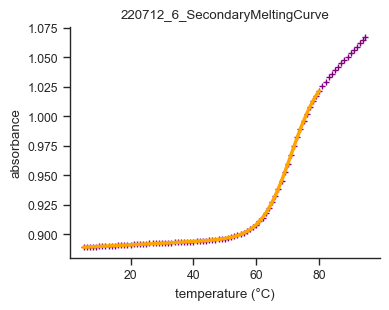

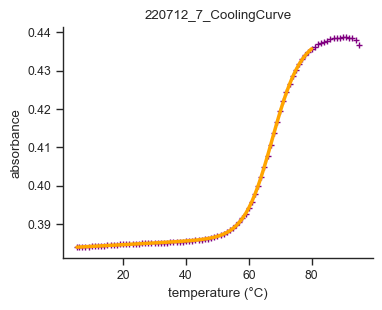

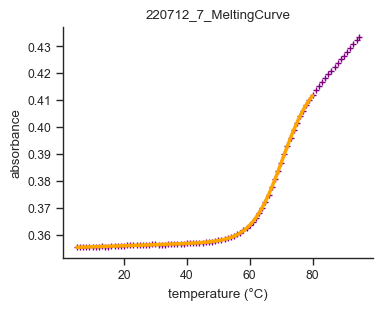

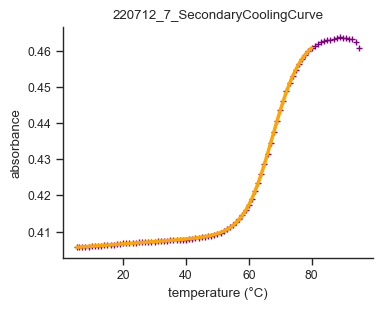

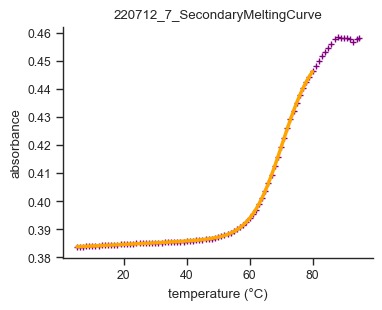

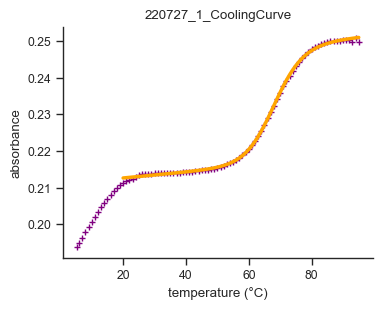

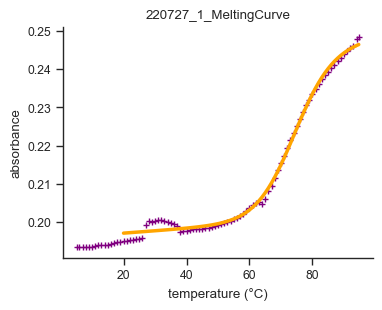

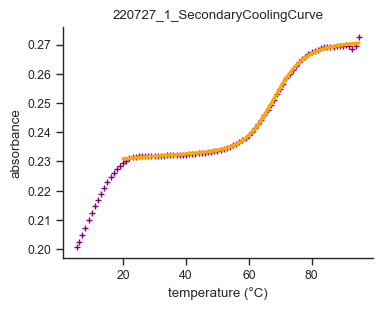

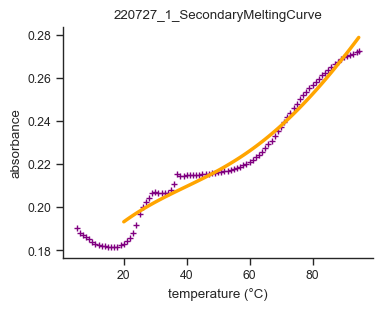

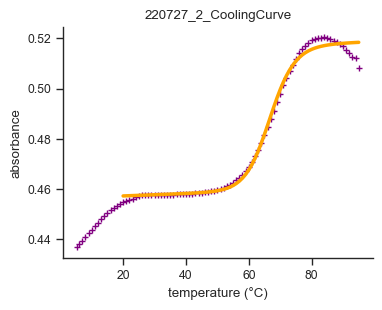

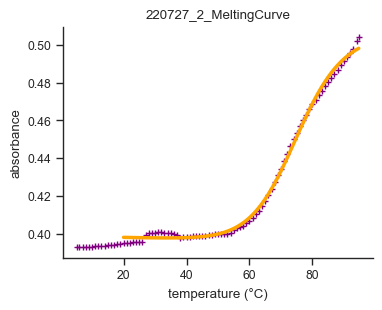

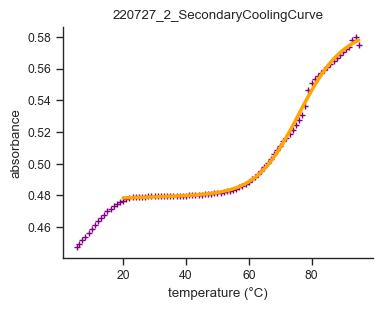

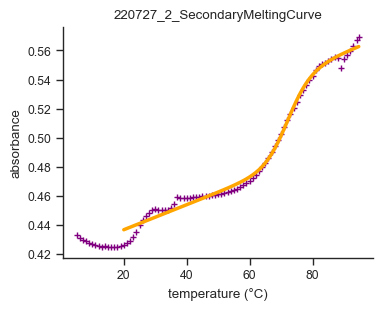

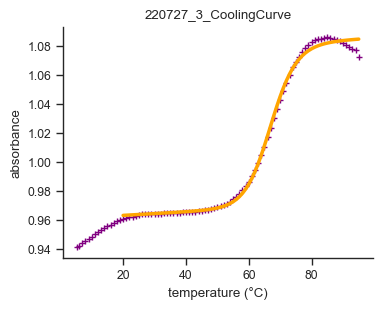

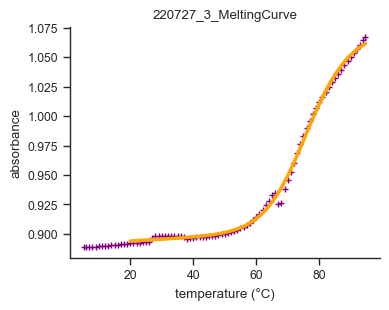

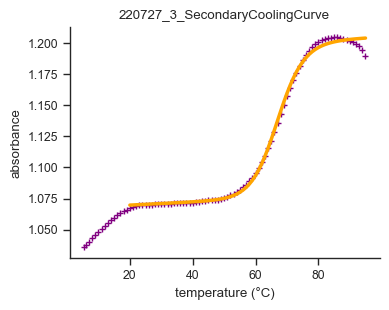

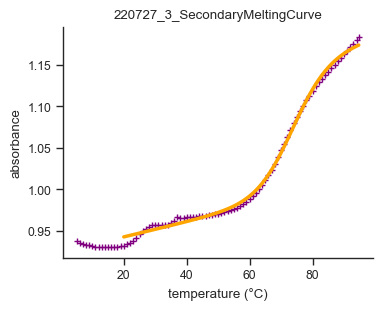

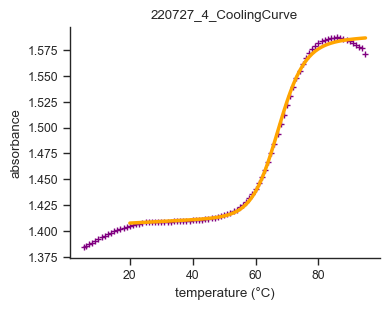

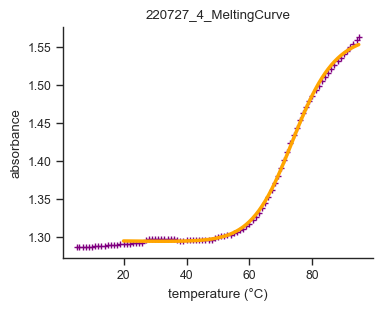

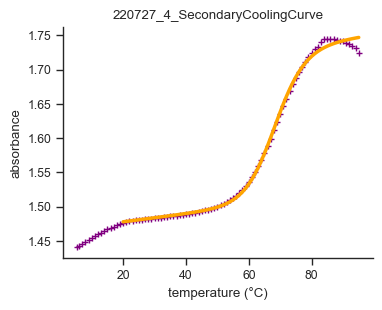

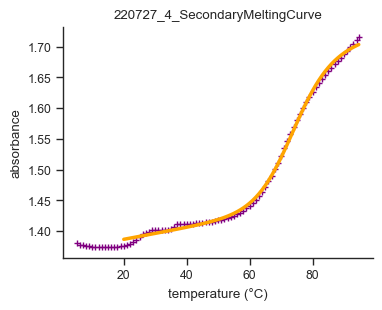

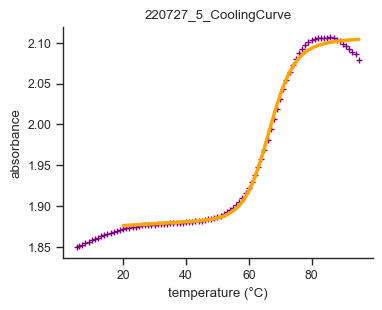

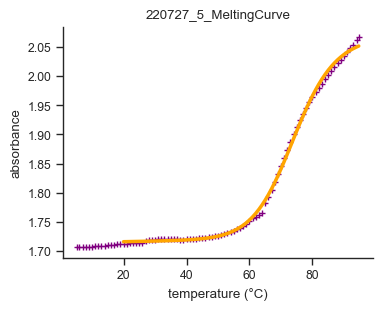

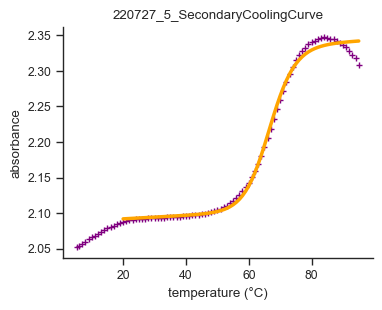

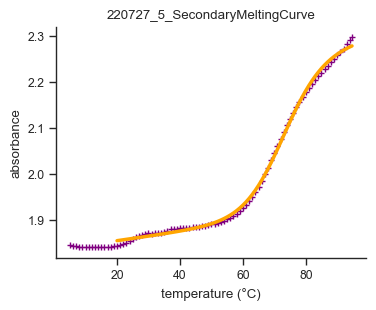

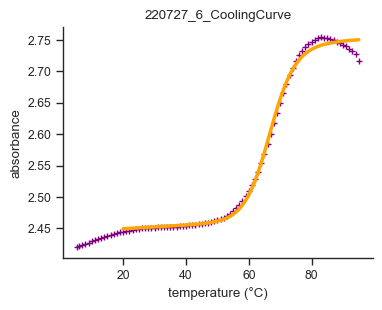

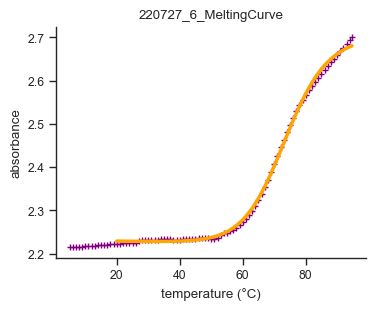

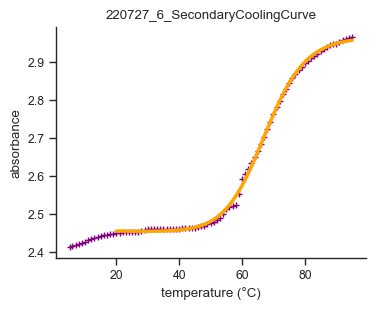

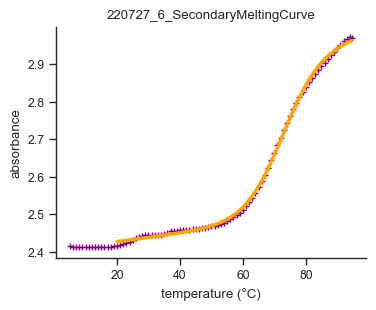

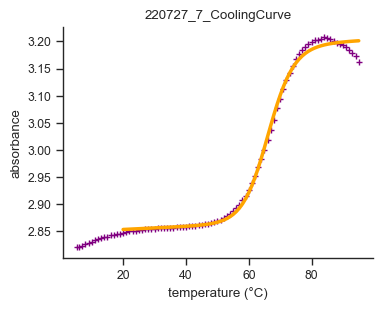

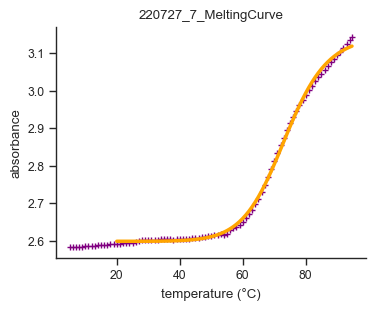

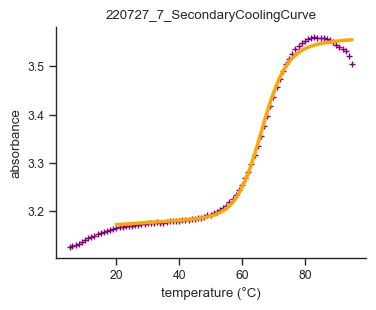

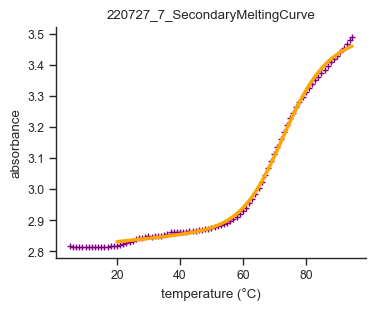

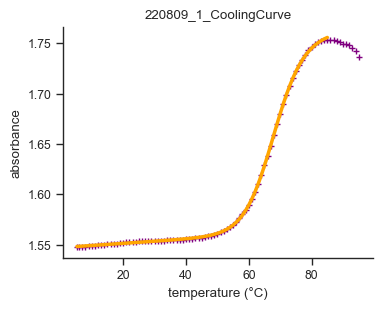

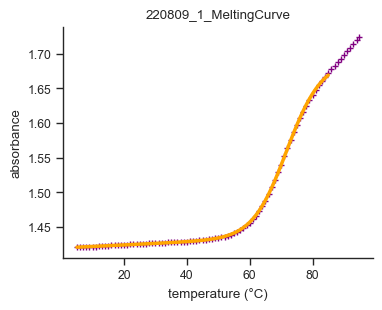

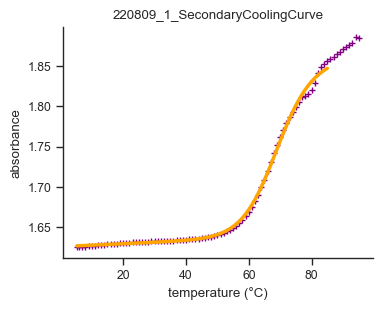

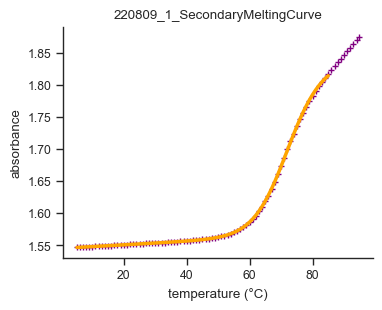

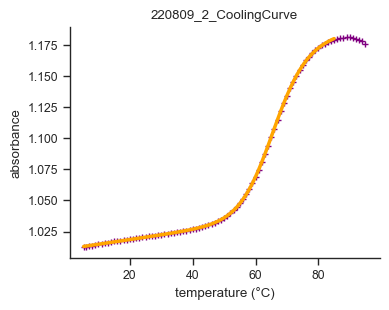

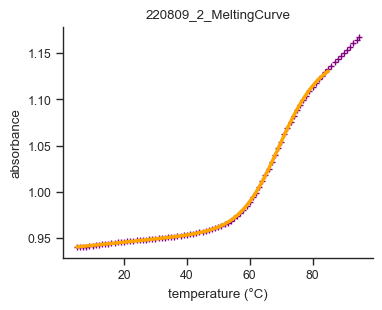

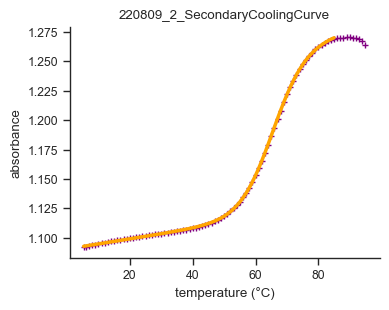

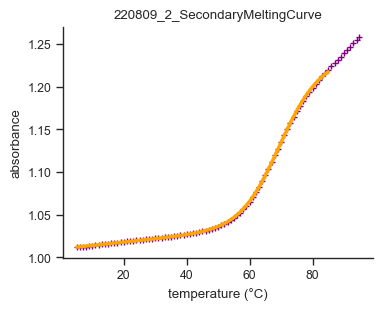

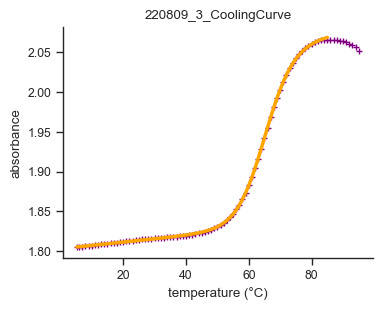

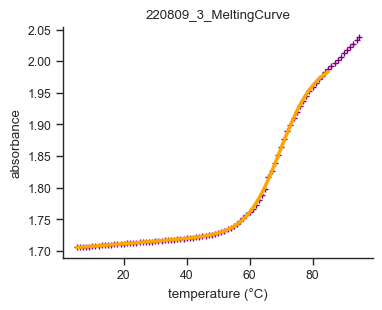

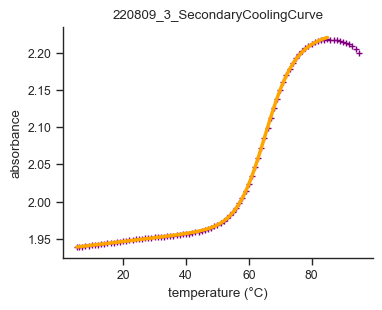

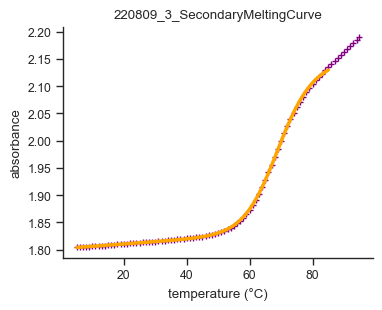

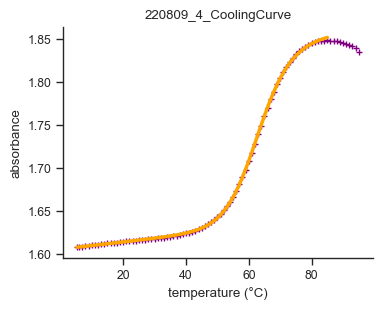

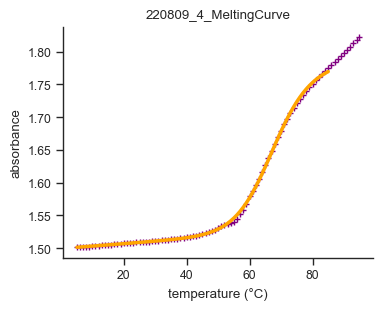

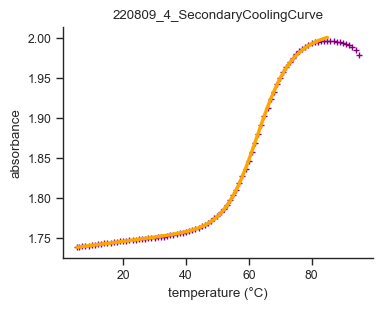

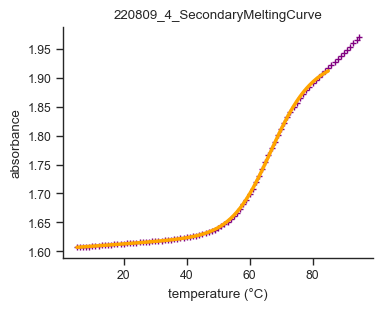

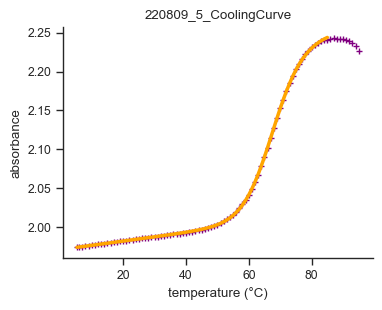

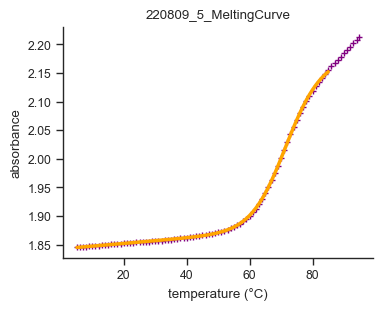

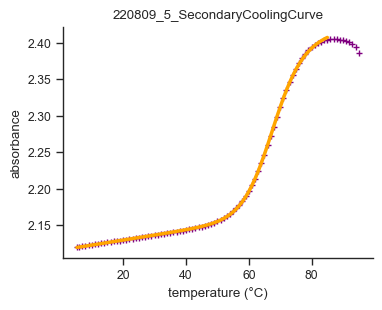

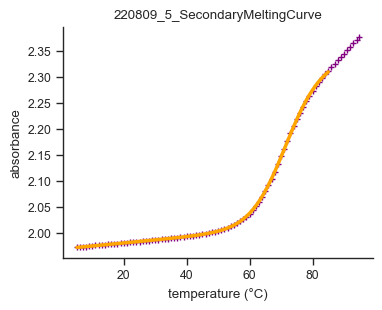

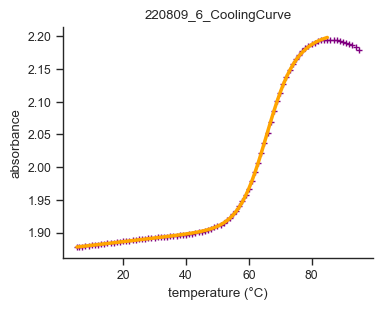

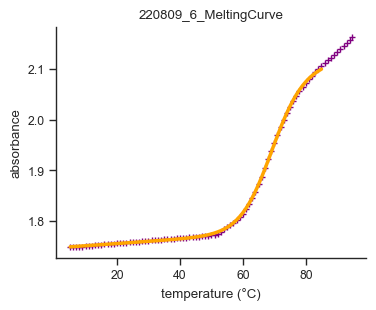

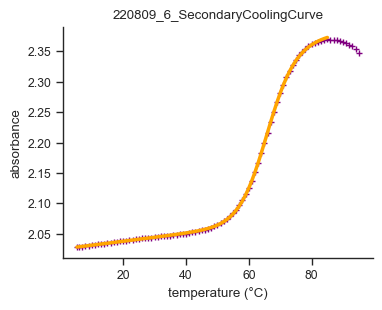

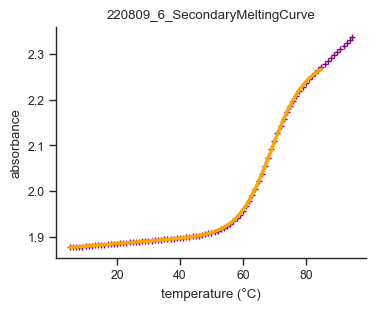

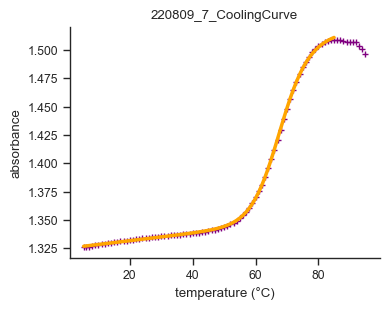

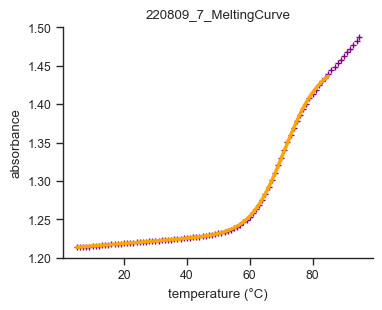

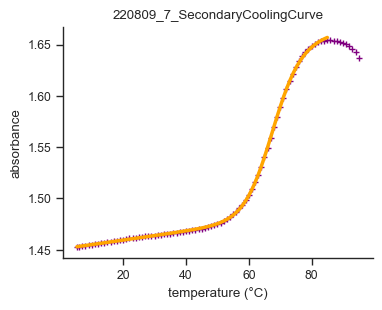

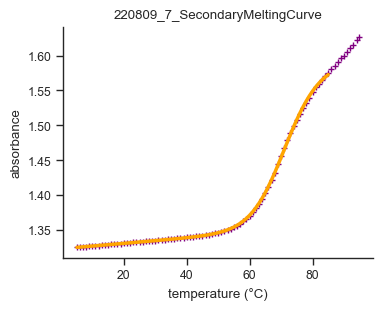

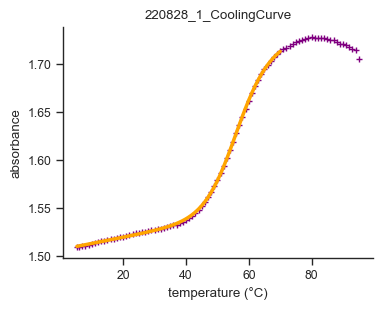

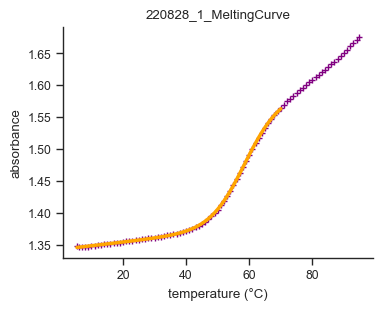

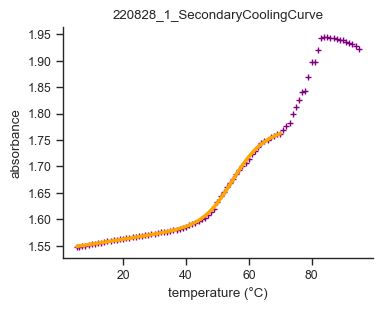

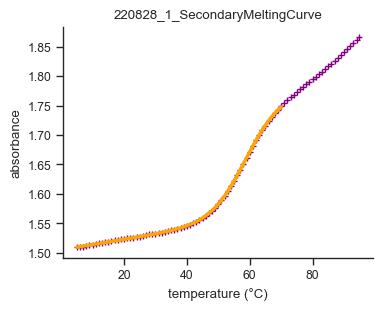

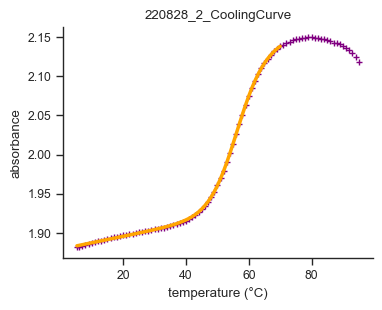

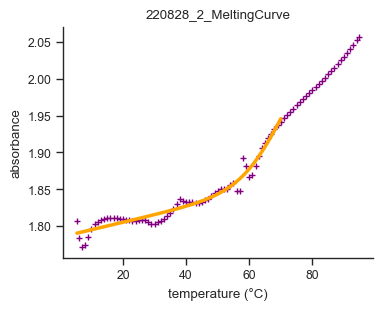

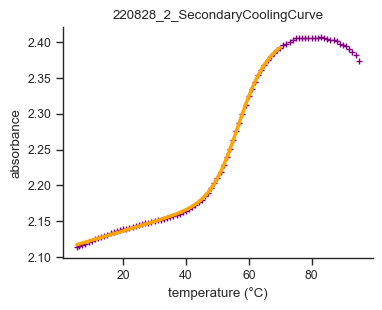

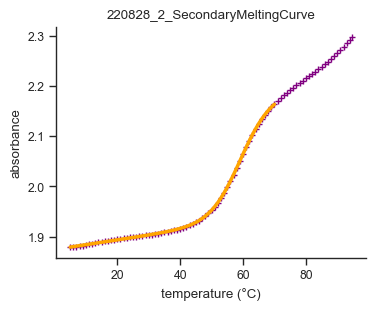

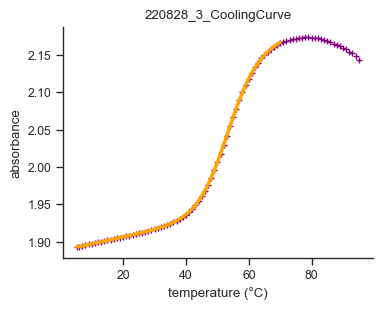

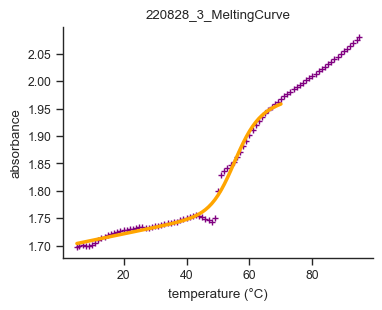

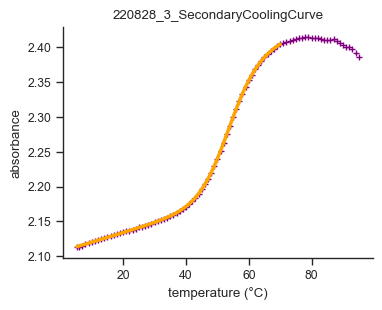

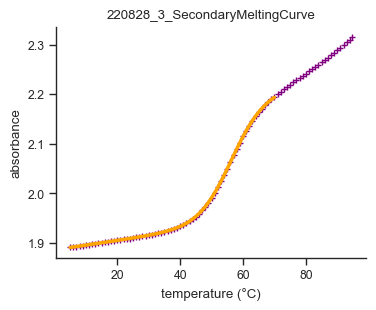

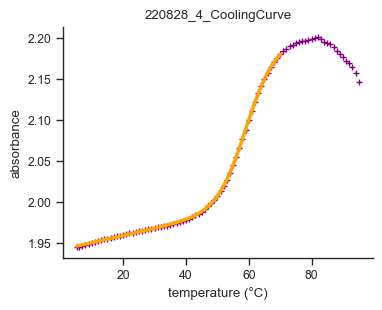

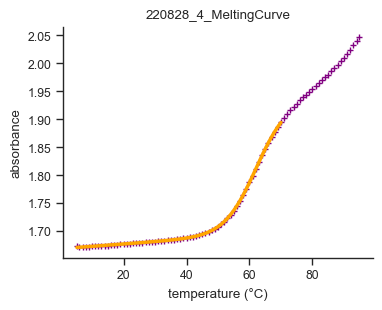

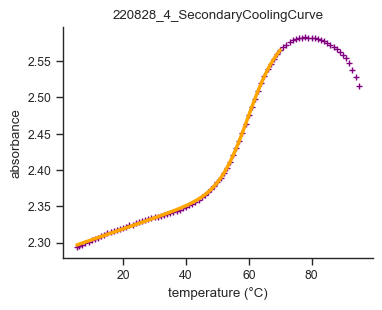

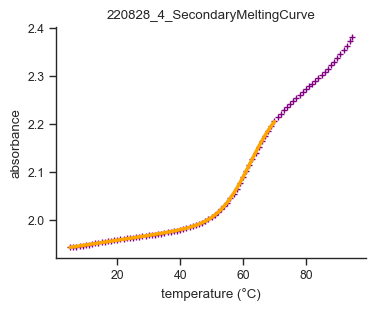

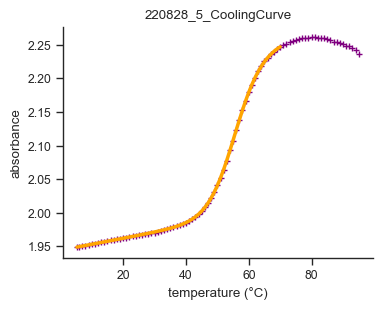

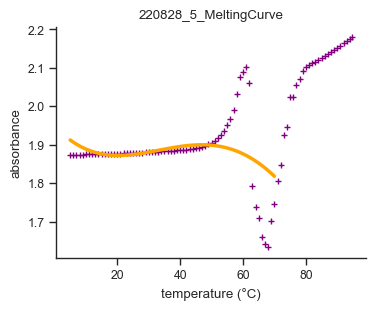

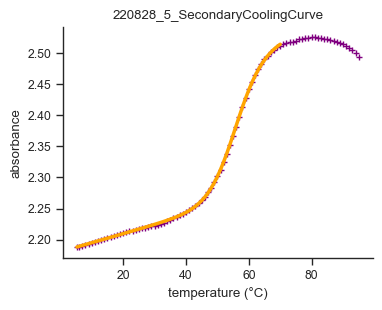

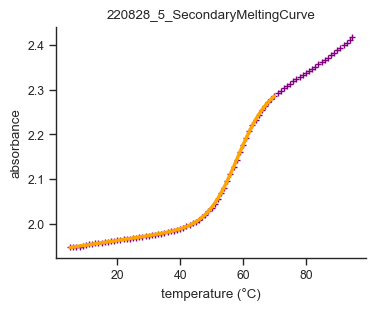

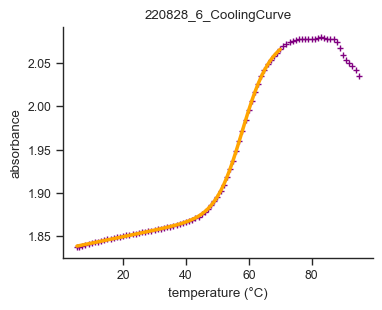

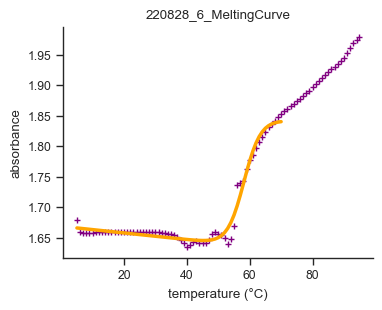

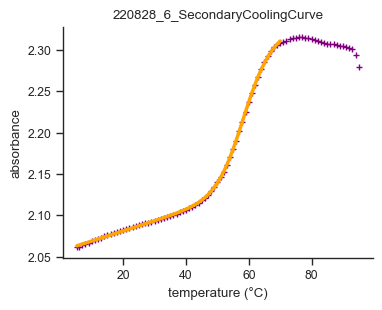

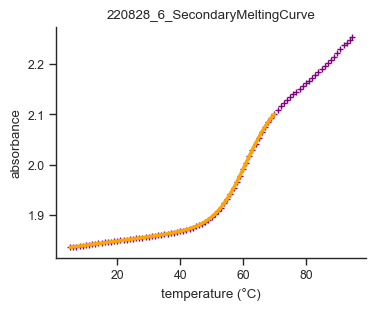

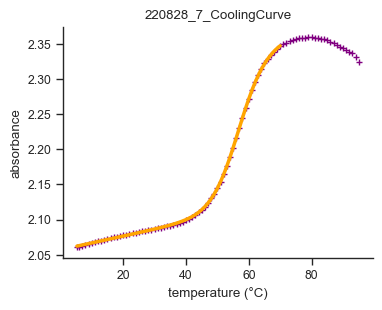

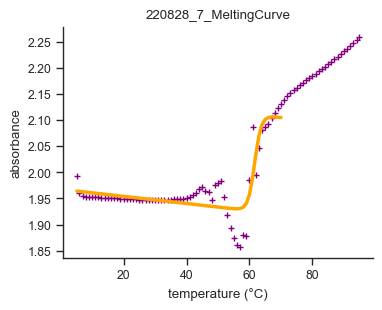

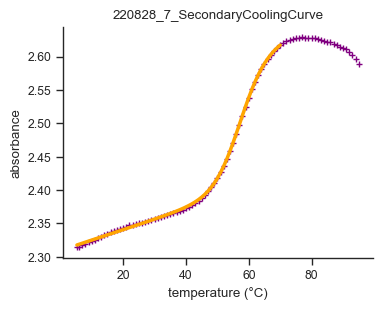

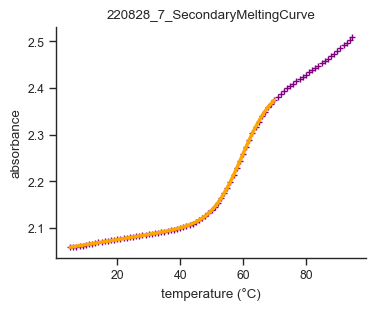

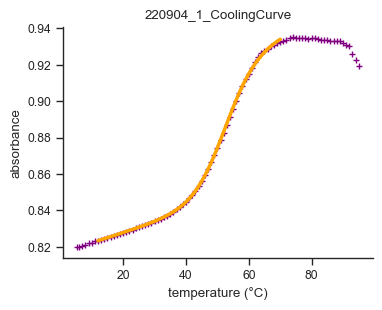

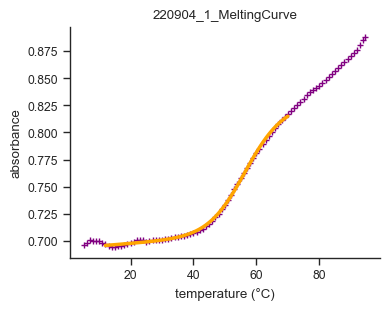

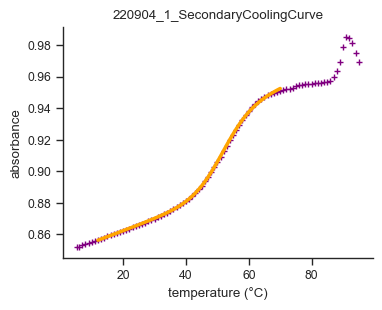

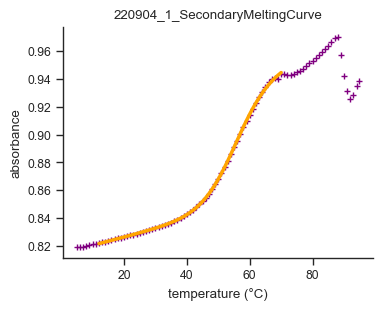

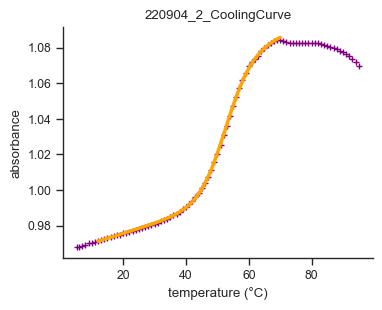

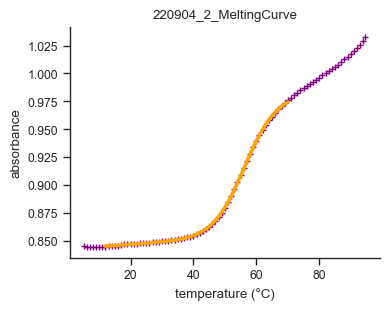

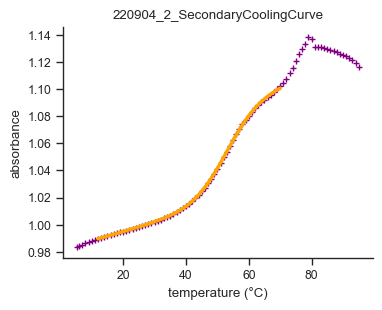

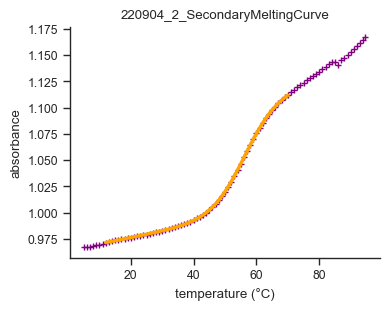

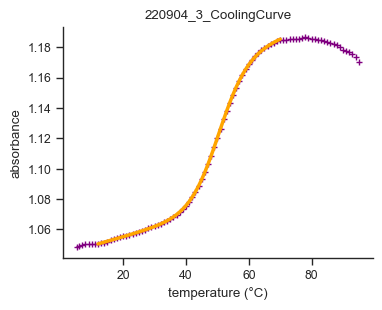

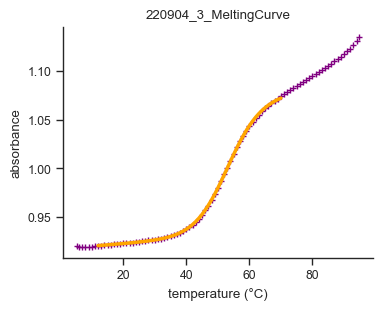

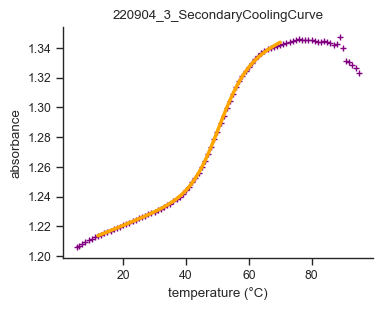

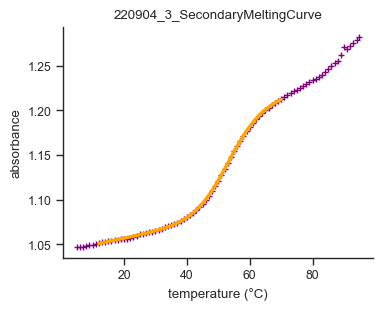

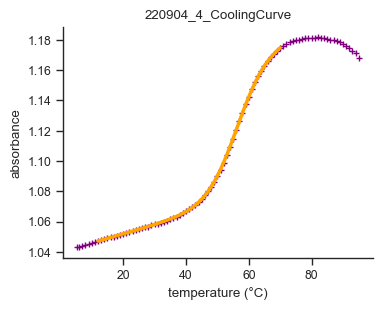

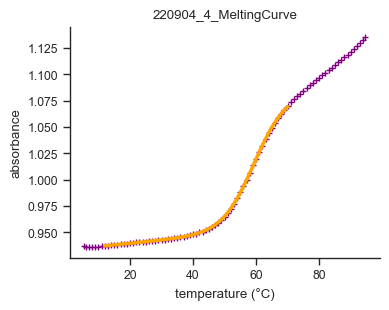

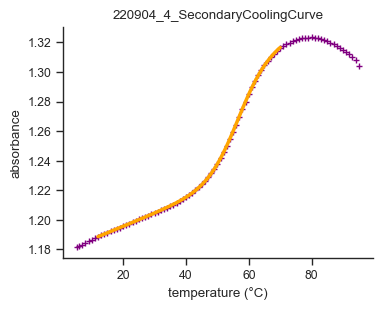

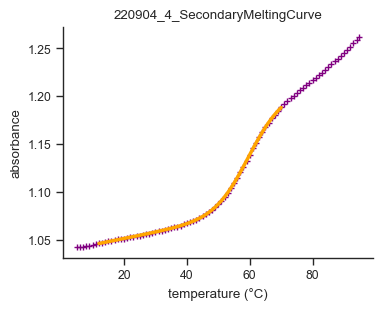

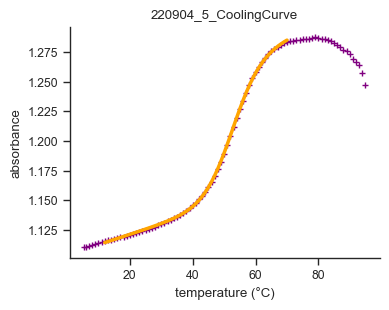

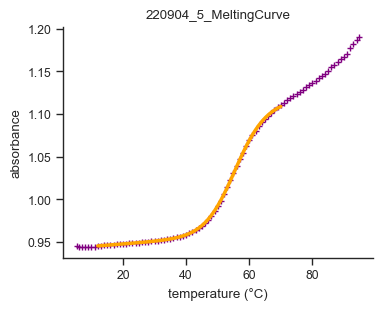

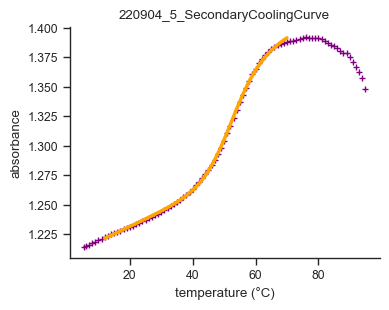

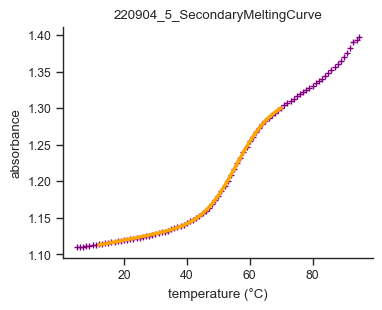

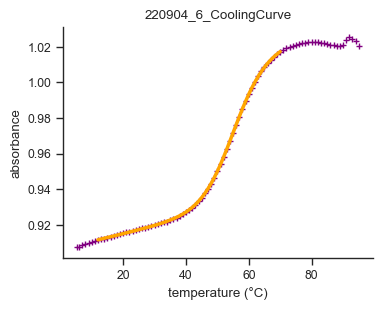

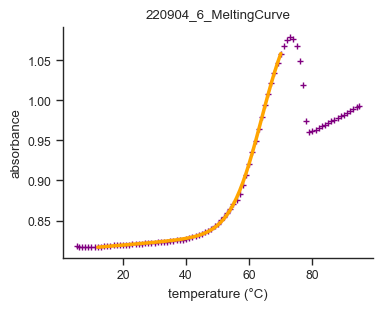

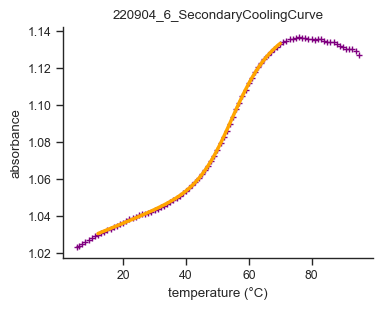

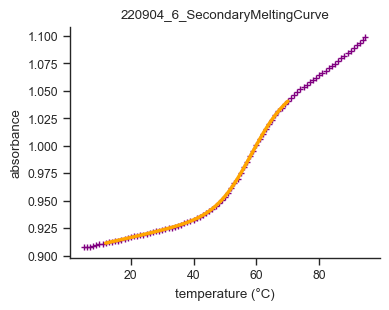

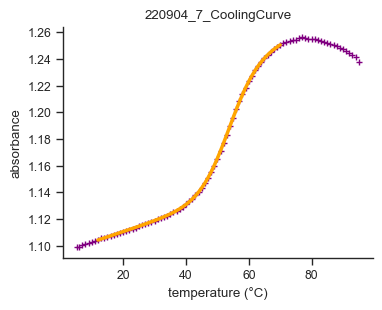

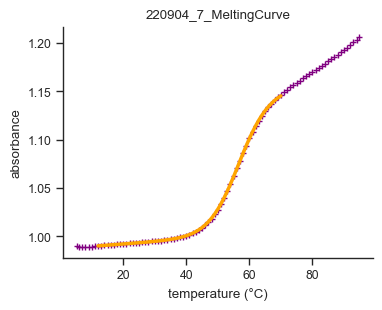

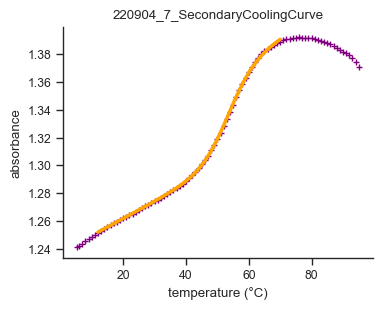

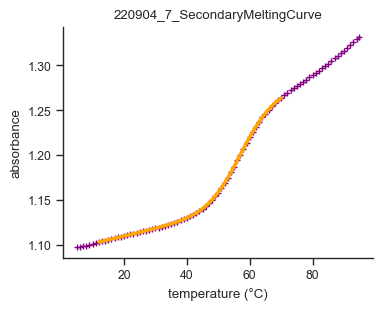

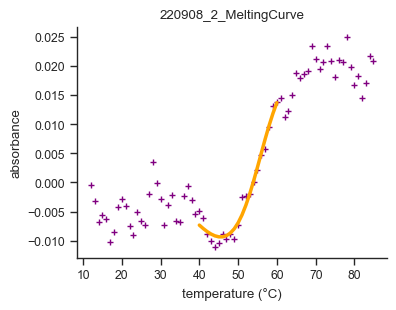

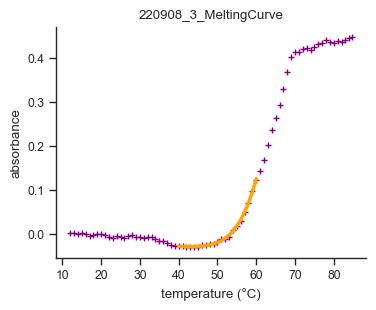

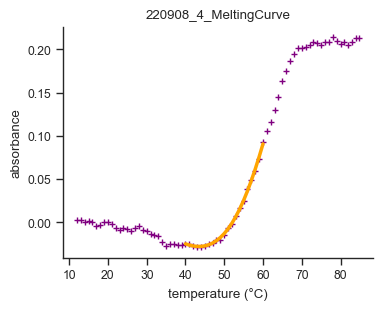

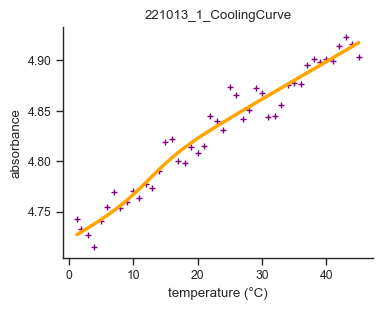

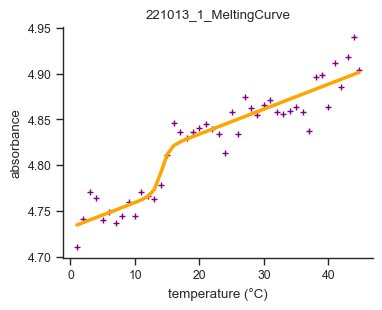

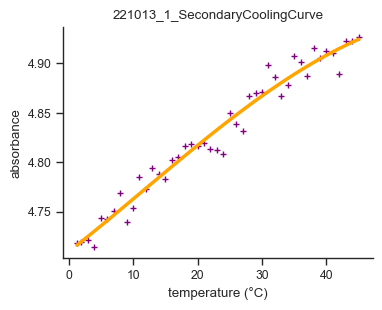

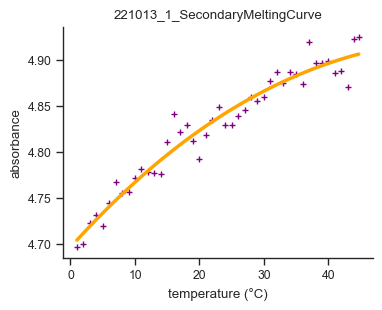

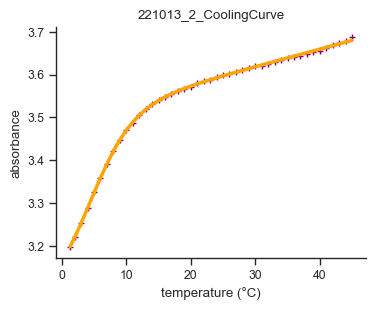

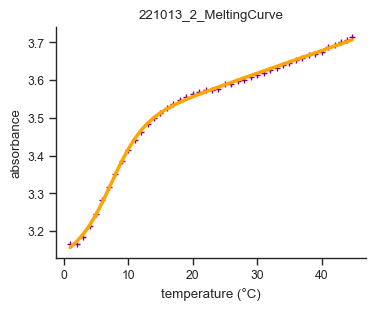

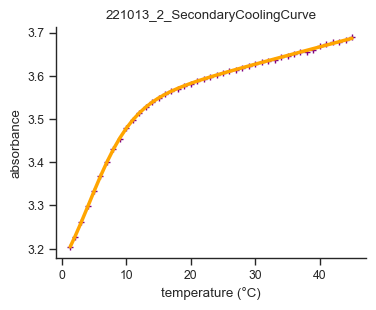

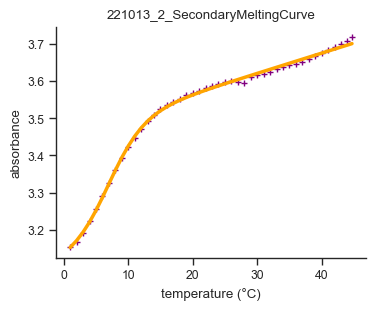

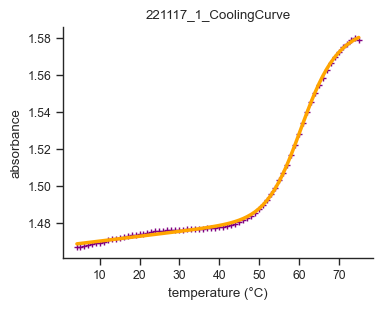

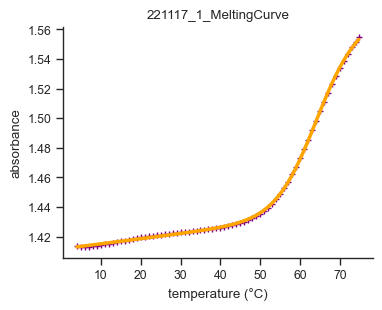

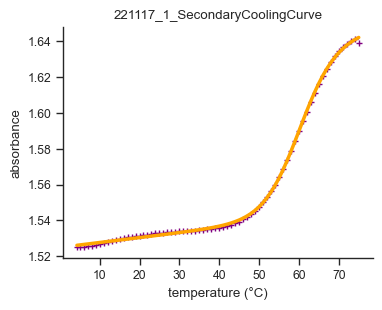

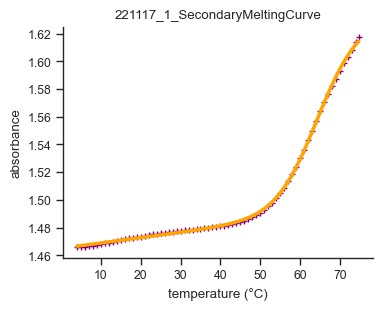

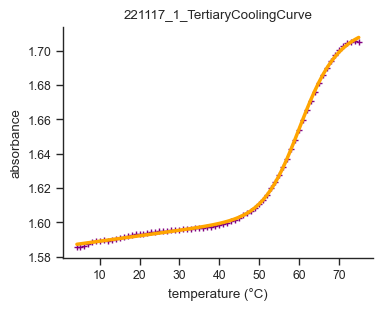

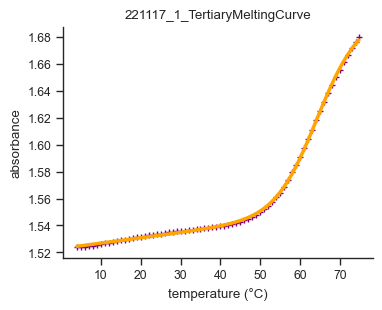

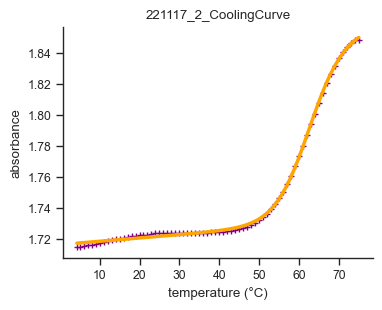

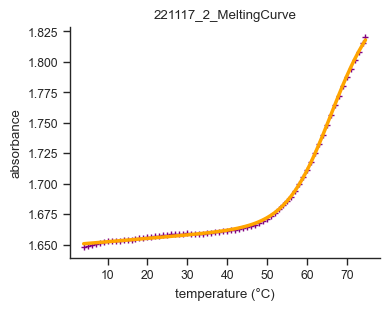

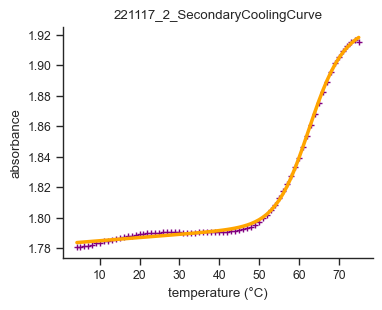

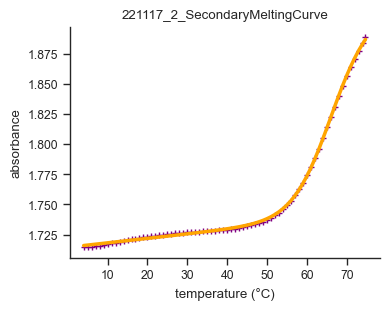

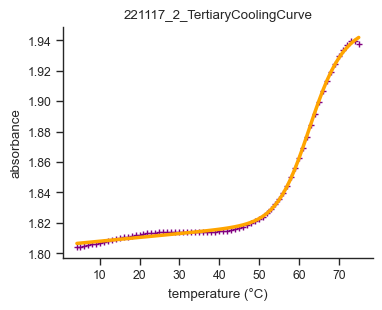

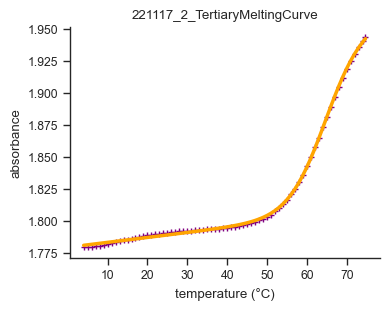

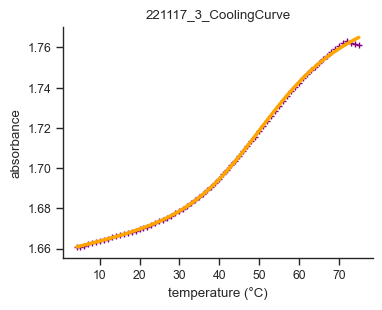

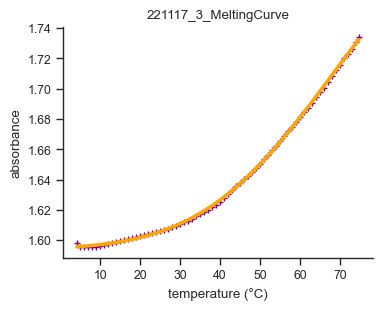

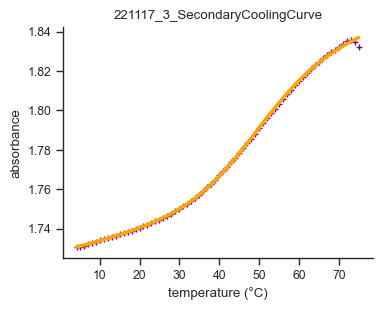

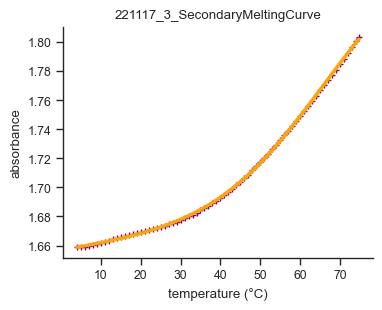

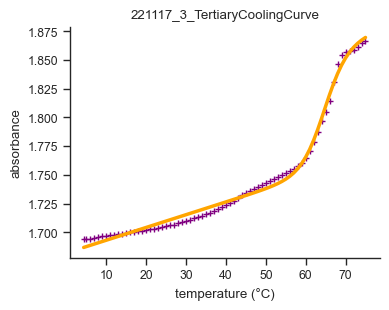

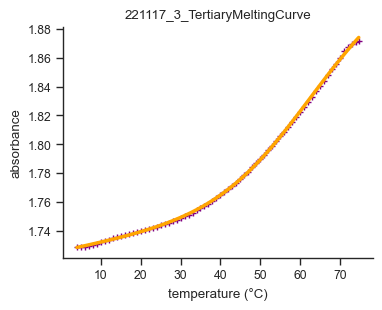

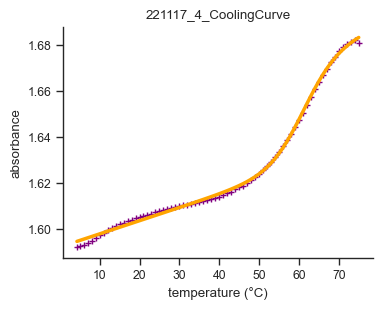

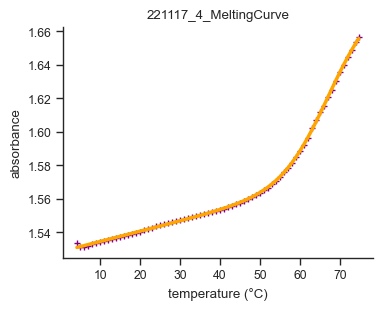

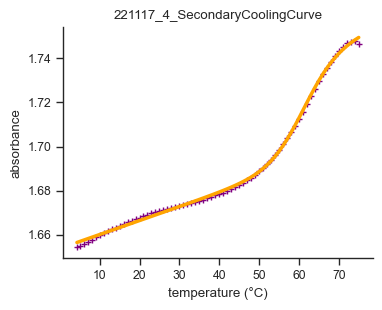

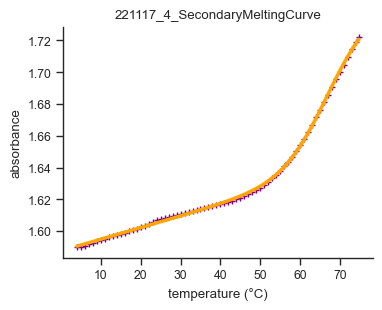

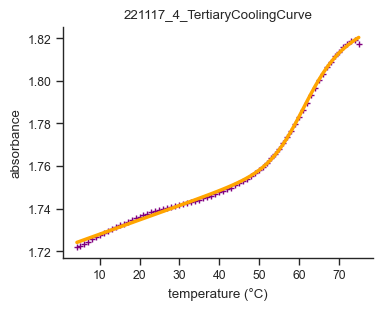

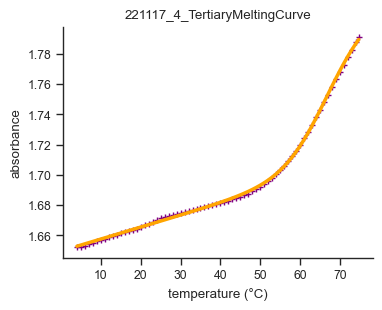

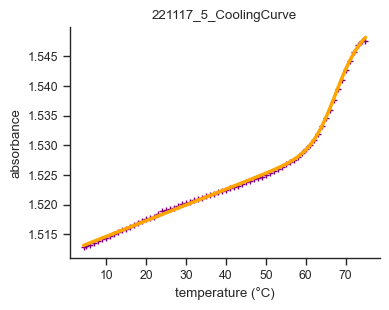

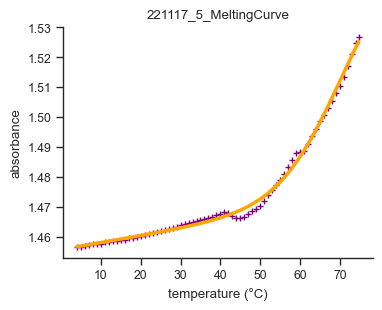

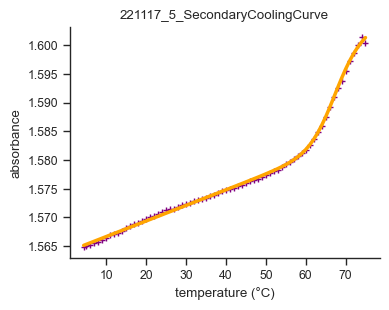

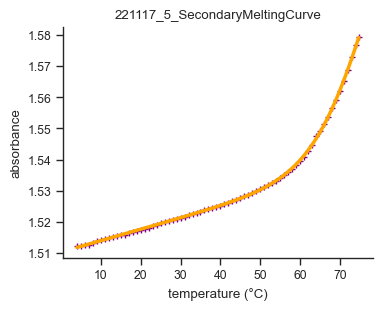

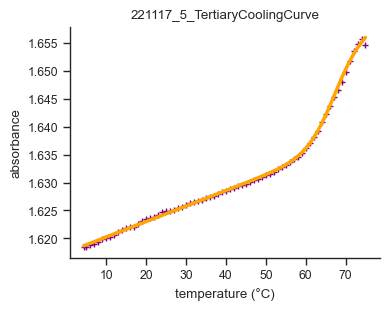

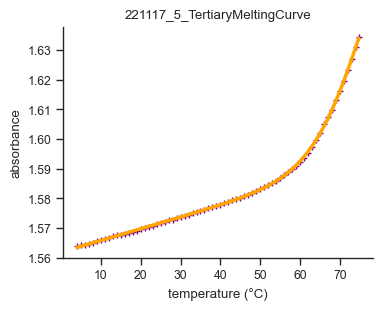

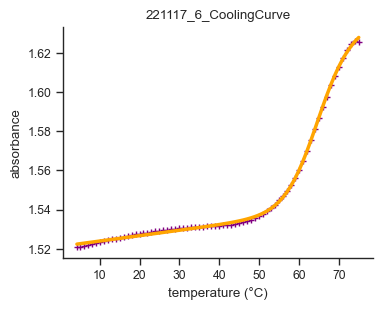

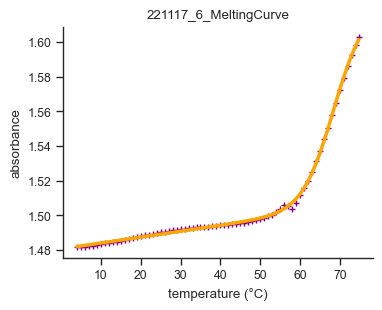

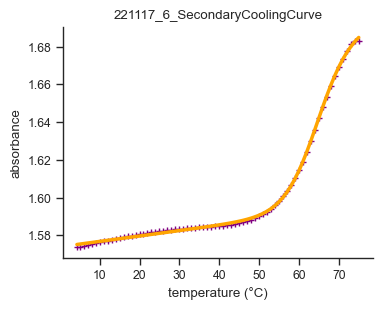

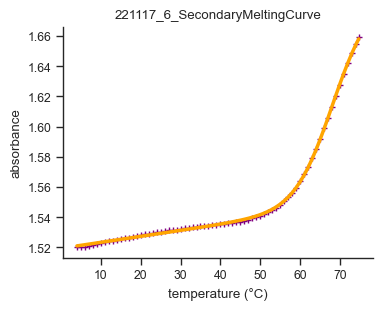

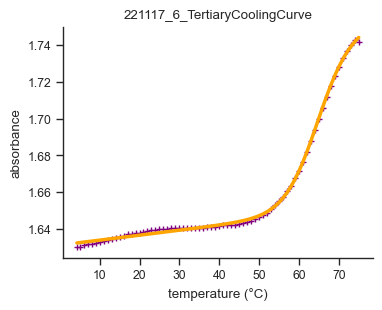

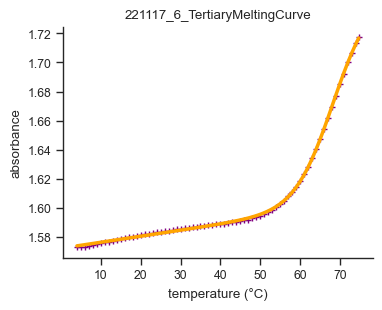

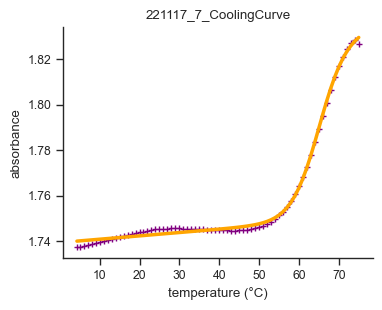

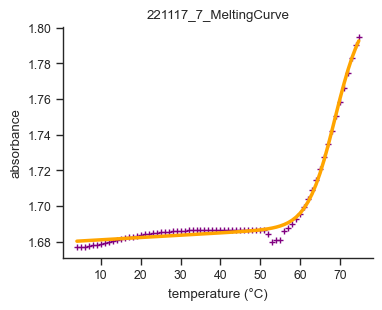

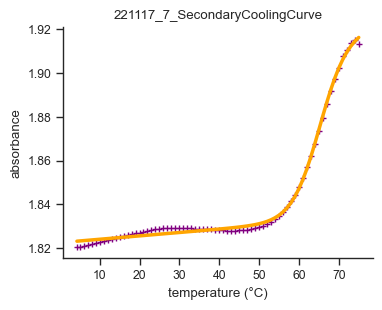

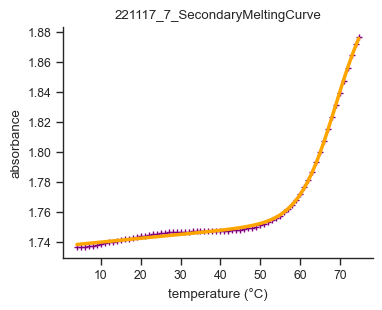

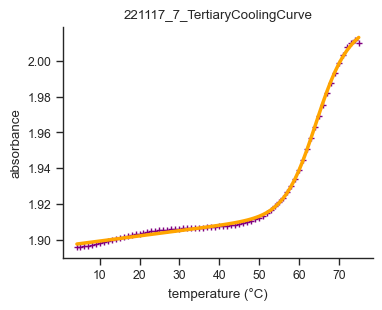

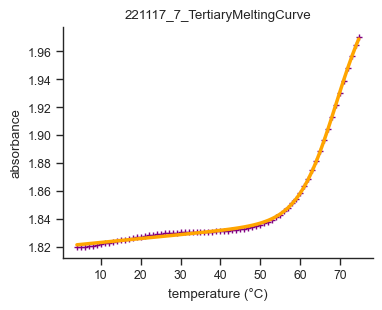

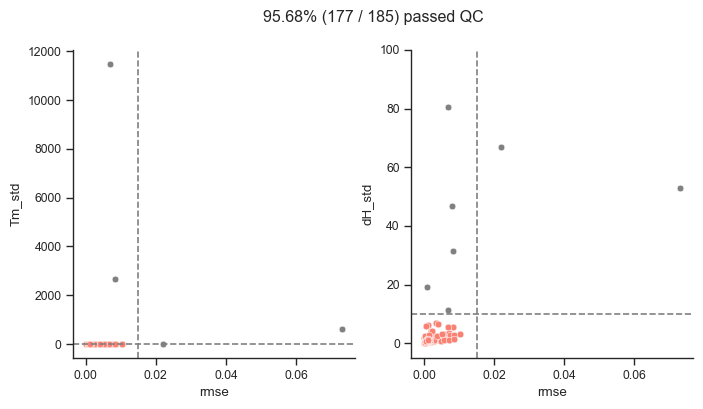

In [11]:
# Run fitting on all curves
result_df = fit_all(datadir="/mnt/d/data/nnn/ECLExport", 
                    sample_sheet_file=sample_sheet_file, 
                    result_file='./data/uv_melt/uvmelt_221119.csv')

In [32]:
result_df['isCooling'] = result_df.curve_name.apply(lambda x: 'Cooling' in x)

In [269]:
# Or read from disk
result_df = pd.read_csv('./data/uv_melt/uvmelt_221110.csv', index_col=0).query('pass_qc')

Let's plot the curves that did not pass QC:

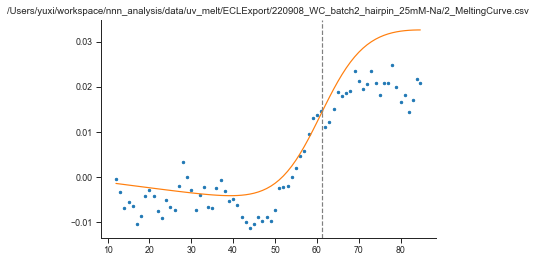

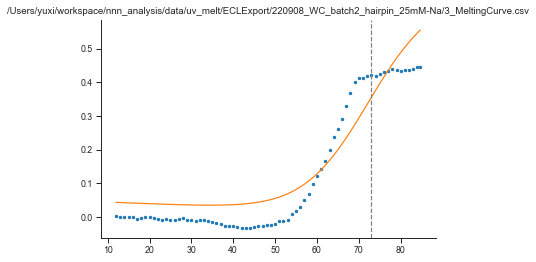

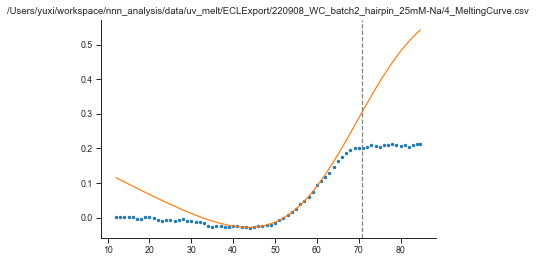

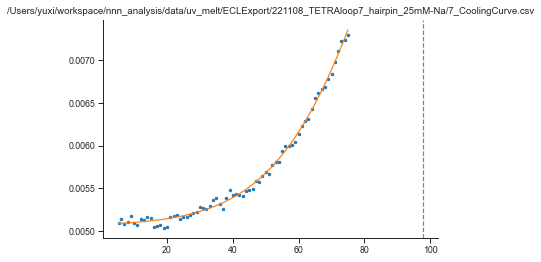

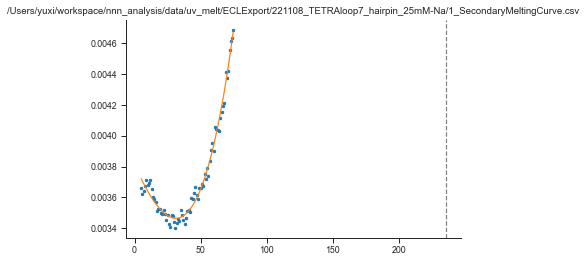

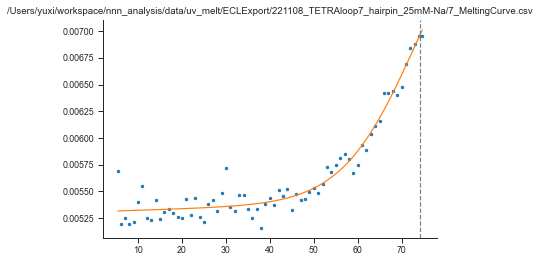

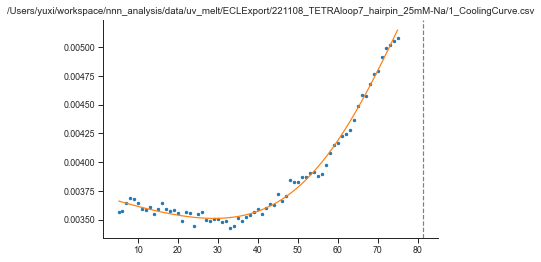

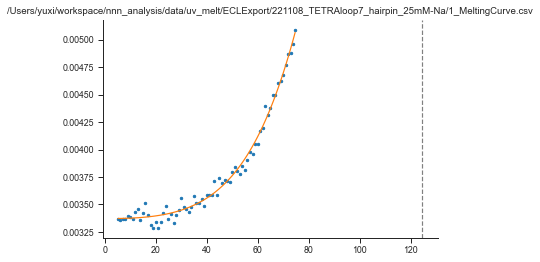

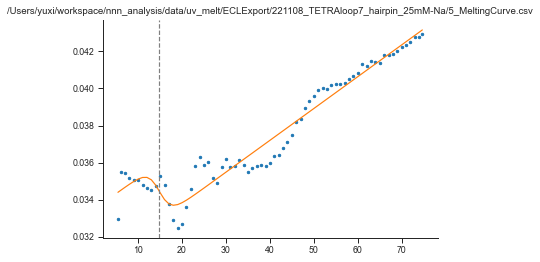

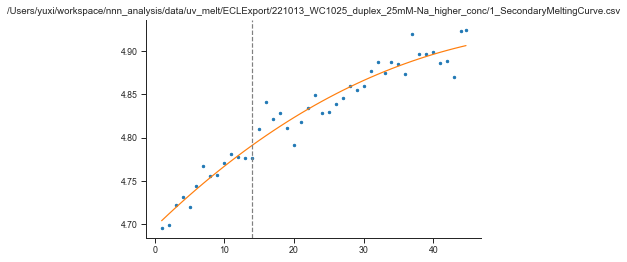

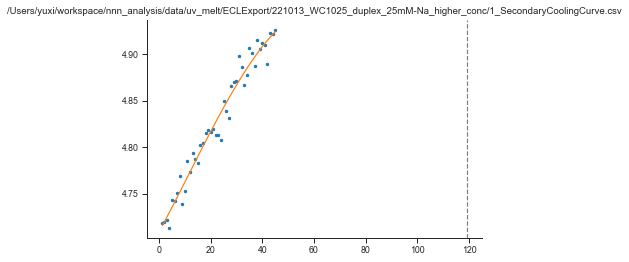

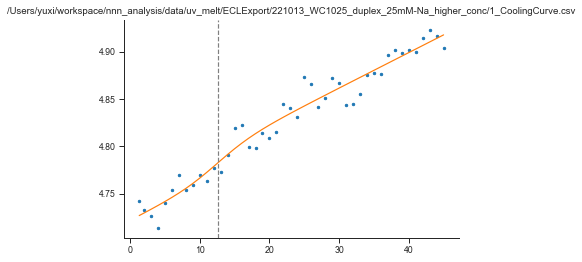

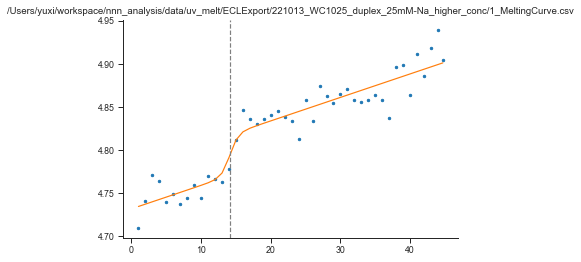

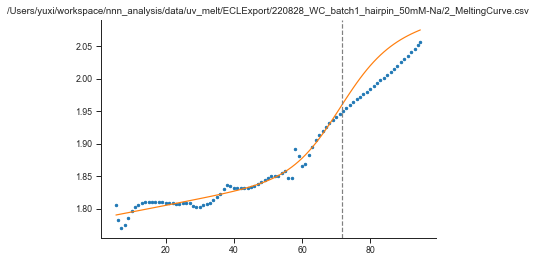

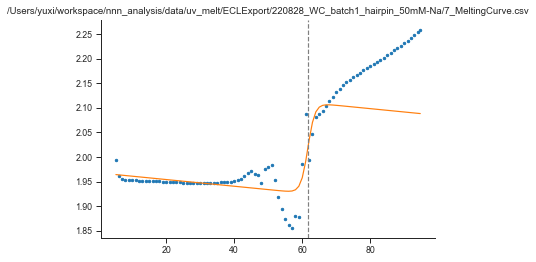

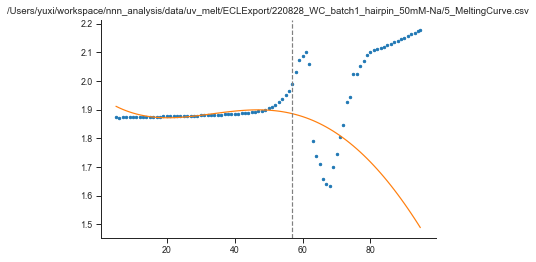

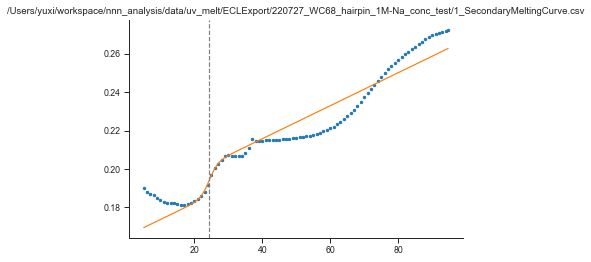

In [146]:
df = result_df.query('~pass_qc')
for i,row in df.iterrows():
    plot_curve_fit_result(row)

Now aggregate the results in the sample (different melt and cooling curves):

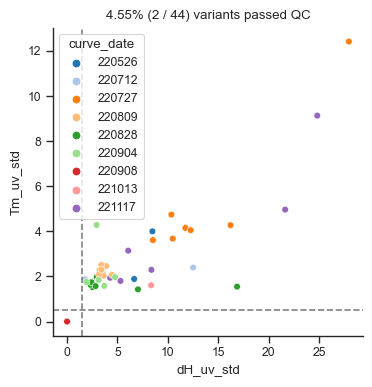

In [33]:
result_agg_df = agg_fit_result(uvmelt_result_file='./data/uv_melt/uvmelt_221119.csv',
                               agg_result_file='./data/uv_melt/uvmelt_agg_221119.csv',
                               sample_sheet_file=sample_sheet_file, clean=False, only_use_cooling=True)

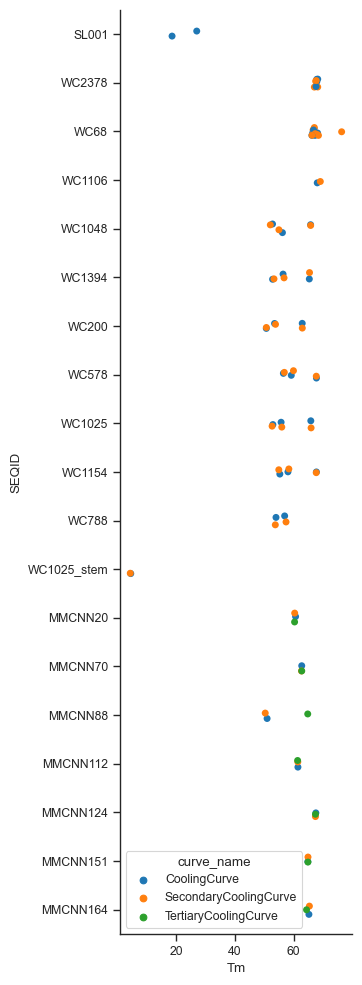

In [35]:
fig, ax = plt.subplots(figsize=(3,12))
sns.stripplot(data=result_df.query('pass_qc & isCooling'), y='SEQID', x='Tm',hue='curve_name', palette='tab10')
sns.despine()

In [42]:
arr = pd.read_csv('./data/models/raw/arr_v0.csv', index_col=0)

df = result_agg_df.merge(arr, how='left', on='SEQID')

In [47]:
df.Series

0      MisMatches
1      MisMatches
2      MisMatches
3      MisMatches
4      MisMatches
5      MisMatches
6      MisMatches
7             NaN
8             NaN
9     WatsonCrick
10    WatsonCrick
11    WatsonCrick
12    WatsonCrick
13    WatsonCrick
14    WatsonCrick
15    WatsonCrick
16    WatsonCrick
17    WatsonCrick
18    WatsonCrick
19    WatsonCrick
20    WatsonCrick
21    WatsonCrick
22    WatsonCrick
23    WatsonCrick
24    WatsonCrick
25    WatsonCrick
26    WatsonCrick
27    WatsonCrick
28    WatsonCrick
29    WatsonCrick
30    WatsonCrick
31    WatsonCrick
32    WatsonCrick
33    WatsonCrick
34    WatsonCrick
35    WatsonCrick
36    WatsonCrick
37    WatsonCrick
38    WatsonCrick
39    WatsonCrick
40    WatsonCrick
41    WatsonCrick
42    WatsonCrick
43    WatsonCrick
Name: Series, dtype: object

In [49]:
df_q

Empty DataFrame
Columns: [SEQID, curve_date, curve_num, dH_uv, dH_uv_std, Tm_uv, Tm_uv_std, dG_37_uv, dG_37_uv_std, dS_uv, dS_uv_std, is_hairpin, Na_mM, conc_uM, purification, pass_qc, dH, dH_se, dH_lb, dH_ub, Tm, Tm_se, Tm_lb, Tm_ub, dG_37, dG_37_se, dG_37_lb, dG_37_ub, dS, dS_se, dS_lb, dS_ub, fmax, fmax_se, fmax_lb, fmax_ub, fmin, fmin_se, fmin_lb, fmin_ub, Series, ConstructType, bottomScaffold, topScaffold, RefSeq, dH_NUPACK, dS_NUPACK, Tm_NUPACK, dG_37_ensemble_NUPACK, TargetStruct, dG_37_NUPACK, dG_37_ensemble_150mM_NUPACK, dG_37_ensemble_75mM_NUPACK, GC, Tm_NUPACK_salt_corrected, dG_37_NUPACK_salt_corrected, dH_NUPACK_salt_corrected, dS_NUPACK_salt_corrected]
Index: []

[0 rows x 58 columns]

ValueError: x and y must have length at least 2.

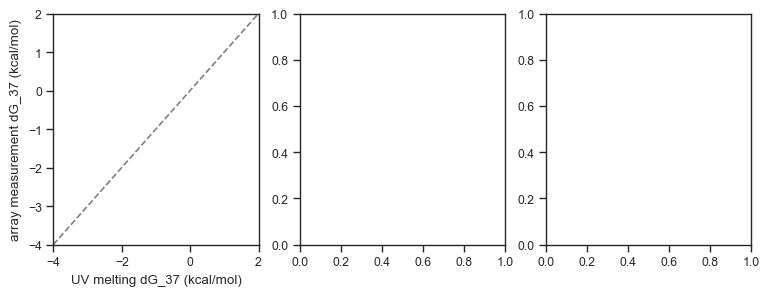

In [50]:
plot_query = 'Na_mM == 25 & is_hairpin & Series == "MisMatches"'
df_q = df.query(plot_query)

def plot_uv_comparison(df_q, param, lim, array_suffix=''):
    unit_dict = dict(dH='kcal/mol', dS='kcal/mol', dG_37='kcal/mol', Tm='°C')
    unit = unit_dict[param]
    fig, ax = plt.subplots(1, 3, figsize=(9,3))
    ax[0].plot(lim, lim, '--', c='gray')
    ax[0].errorbar(df_q[param + '_uv'], df_q[param+array_suffix],
                   xerr=df_q[param+'_uv_std'], yerr=df_q[param+'_se'],
                   fmt='k.')
    ax[0].set_xlim(lim)
    ax[0].set_ylim(lim)
    ax[0].set_xlabel(f'UV melting {param} ({unit})')
    ax[0].set_ylabel(f'array measurement {param} ({unit})')
    ax[0].set_title('Array Melt Measurement\ncorr = %.4f' %
                    pearsonr(df_q[param + '_uv'], df_q[param+array_suffix])[0])

    ax[1].errorbar(df_q[param+'_uv'], df_q[param+'_NUPACK_salt_corrected'],
                   xerr=df_q[param+'_uv_std'],
                   fmt='k.')
    ax[1].plot(lim, lim, '--', c='gray')
    ax[1].set_xlim(lim)
    ax[1].set_ylim(lim)
    ax[1].set_xlabel(f'UV melting {param} ({unit})')
    ax[1].set_ylabel(f'NUPACK prediction {param} ({unit})')
    ax[1].set_title('NUPACK prediction\ncorr = %.4f' %
                    pearsonr(df_q[param+'_uv'], df_q[param+'_NUPACK_salt_corrected'])[0])

    x = df_q[param+array_suffix]
    y = df_q[param+'_NUPACK_salt_corrected']
    ax[2].errorbar(x, y,
               xerr=df_q[param+'_uv_std'],
               fmt='k.')
    ax[2].plot(lim, lim, '--', c='gray')
    ax[2].set_xlim(lim)
    ax[2].set_ylim(lim)
    ax[2].set_xlabel(f'UV melting {param} ({unit})')
    ax[2].set_ylabel(f'NUPACK prediction {param} ({unit})')
    ax[2].set_title('Array Melt vs NUPACK prediction\ncorr = %.4f' %
                    pearsonr(x, y)[0])
    
    plt.suptitle(param)
    sns.despine()
    plt.show()
    
plot_uv_comparison(df_q, 'dG_37', lim = (-4, 2))
plot_uv_comparison(df_q, 'dH', lim = (-60, -20))
plot_uv_comparison(df_q, 'Tm', lim = (20, 80))
plot_uv_comparison(df_q, 'dS', lim = (-.2, -.05))

In [413]:
plot_query = 'Na_mM == 25 & is_hairpin'
df_q = df.query(plot_query)

ols_Tm = fit_param_offset(df_q, 'Tm', fix_slope=True, adjusted=False)
ols_dG_37 = fit_param_offset(df_q, 'dG_37', fix_slope=True, adjusted=False)
ols_dH = fit_param_offset(df_q, 'dH', fix_slope=True, adjusted=False)
ols_dS = fit_param_offset(df_q, 'dS', fix_slope=True, adjusted=False)
print(ols_Tm.coef_, ols_dG_37.coef_, ols_dH.coef_, ols_dS.coef_)
correction = dict(Tm=ols_Tm.coef_, dG_37=ols_dG_37.coef_)

fileio.write_pickle(correction, './data/uv_melt/correction.pkl')

[ 1.        12.6771236] [ 1.         -1.13626671] [1.         2.74880351] [1.         0.01283626]


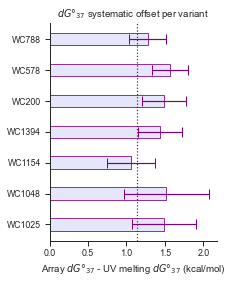

In [405]:
# correction = fileio.read_pickle('./data/uv_melt/correction.pkl')

plot_query = 'Na_mM == 25 & is_hairpin & (Series == "WatsonCrick")'
df_q = df.query(plot_query)

plt.figure(figsize=(3, 4))
plt.barh(df_q['SEQID'], df_q['dG_37'] - df_q['dG_37_uv'], 
        xerr=df_q['dG_37_se'] + df_q['dG_37_uv_std'],
        fc='lavender', height=0.4, edgecolor='purple', ecolor='purple', capsize=5)
plt.axvline(x=-correction['dG_37'][1], c='purple', linestyle=':')
plt.xlabel(r'Array $dG°_{37}$ - UV melting $dG°_{37}$ (kcal/mol)')
plt.title(r'$dG°_{37}$ systematic offset per variant')
sns.despine()
util.save_fig('./fig/UV_melt/dG_37_offset_per_variant_new.pdf')

In [418]:
p = 'Tm'
arr[p+'_corrected'] = correct_param(arr, correction, p)
arr['dG_37_corrected'] = util.get_dG(dH=arr.dH, Tm=arr.Tm_corrected, celsius=37)

plotting.plot_colored_scatter_comparison(data=arr, x='dG_37', y='dG_37_corrected', lim=(-7, 3))

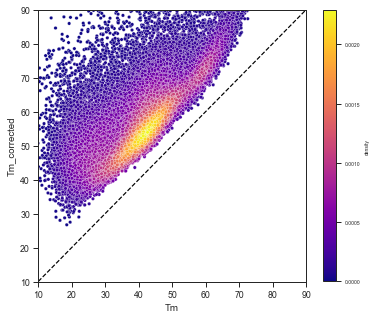

In [442]:
p = 'dG_37'
arr[p+'_corrected'] = correct_param(arr, correction, p)
arr['Tm_corrected'] = (C2T + 37) / (1 - arr.dG_37_corrected / arr.dH) - C2T

plotting.plot_colored_scatter_comparison(data=arr, x='Tm', y='Tm_corrected', lim=(10, 90))

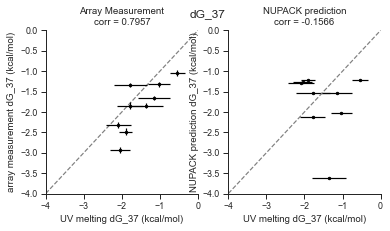

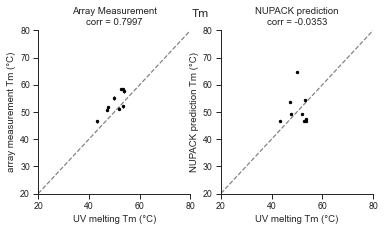

In [439]:
# Only correct Tm
arr = pd.read_csv('./data/models/raw/arr_v0.csv', index_col=0)
p = 'Tm'
arr[p+'_corrected'] = correct_param(arr, correction, p)
arr['dG_37_corrected'] = util.get_dG(dH=arr.dH, Tm=arr.Tm_corrected, celsius=37)
df = result_agg_df.merge(arr, how='left', on='SEQID')

plot_query = 'Na_mM == 25 & is_hairpin & dG_37_uv_std < 0.5  & (Series != "WatsonCrick")'
# plot_query = 'Na_mM == 25 & is_hairpin & dG_37_uv_std < 0.5'
df_q = df.query(plot_query)

plot_uv_comparison(df_q, 'dG_37', lim = (-4, -0), array_suffix='_corrected')
plot_uv_comparison(df_q, 'Tm', lim = (20, 80), array_suffix='_corrected')

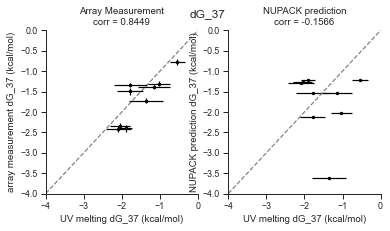

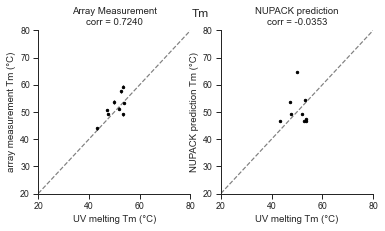

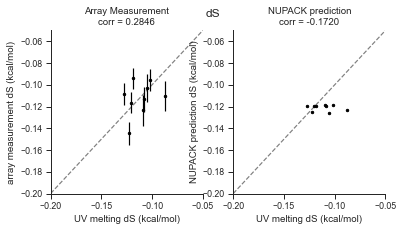

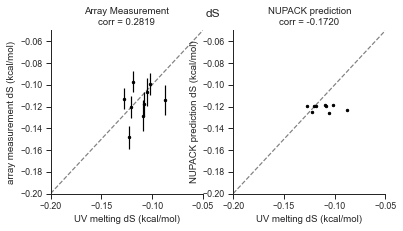

In [448]:
# Only correct dG_37
arr = pd.read_csv('./data/models/raw/arr_v0.csv', index_col=0)
p = 'dG_37'
arr[p+'_corrected'] = correct_param(arr, correction, p)
arr['Tm_corrected'] = (C2T + 37) / (1 - arr.dG_37_corrected / arr.dH) - C2T
arr['dS_corrected'] = arr.dH / (arr.Tm_corrected + C2T)
df = result_agg_df.merge(arr, how='left', on='SEQID')
plot_query = 'Na_mM == 25 & is_hairpin & dG_37_uv_std < 0.5  & (Series != "WatsonCrick")'
# plot_query = 'Na_mM == 25 & is_hairpin & dG_37_uv_std < 0.5'
df_q = df.query(plot_query)

plot_uv_comparison(df_q, 'dG_37', lim = (-4, -0), array_suffix='_corrected')
plot_uv_comparison(df_q, 'Tm', lim = (20, 80), array_suffix='_corrected')
plot_uv_comparison(df_q, 'dS', lim = (-.2, -.05), array_suffix='_corrected')
plot_uv_comparison(df_q, 'dS', lim = (-.2, -.05))

Correcting dG_37 only makes more sense to me. Let's apply the correction and save to file, both with col name suffix and overwriting the uncorrected values in place.

In [449]:
arr = pd.read_csv('./data/models/raw/arr.csv', index_col=0)
p = 'dG_37'
arr[p+'_corrected'] = correct_param(arr, correction, p)
arr['Tm_corrected'] = (C2T + 37) / (1 - arr.dG_37_corrected / arr.dH) - C2T
arr['dS_corrected'] = arr.dH / (arr.Tm_corrected + C2T)

arr.to_csv('./data/models/raw/arr_corrected.csv')

In [450]:
arr = pd.read_csv('./data/models/raw/arr.csv', index_col=0)
p = 'dG_37'
arr[p] = correct_param(arr, correction, p)
arr['Tm'] = (C2T + 37) / (1 - arr.dG_37 / arr.dH) - C2T
arr['dS'] = arr.dH / (arr.Tm + C2T)

arr.to_csv('./data/models/raw/arr_corrected_inplace.csv')

In [451]:
arr = pd.read_csv('./data/models/raw/arr_corrected_inplace.csv', index_col=0)